This notebook uses DECOTA without mixup with raw mutation data as input data.

This uses AUROC when validating model during training and saving best model. There are 2 models, 1 trained with cell lines and 1 trained with TCGA. At evaluation, only model trained with TCGA is used. 

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append("../src/")

In [3]:
import datetime
import logging
import time
import torch
import random

In [4]:
from DecotaModel import ModelDECOTAwoMixup

In [5]:
chosen_seed = 42
torch.manual_seed(chosen_seed)
random.seed(chosen_seed)
np.random.seed(chosen_seed)

In [6]:
torch.multiprocessing.set_sharing_strategy('file_system')

### PACLITAXEL

In [7]:
best_parameters = {'predicted_probability_conf': 0.02558132410980761,
 'predicted_aadrc_conf': 0.4426407765597105,
 'ldr': 0.0714122098684311,
 'lr': 0.353421004069969,
 'weight_decay': 0.08140655912458897,
 'momentum': 0.5812303740531206,
 'step_size': 31,
 'loops_train': 500,
 'loops_warm': 100,
 'hd': 3,
 'batch_size': 64,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [8]:
model_PACLITAXEL = ModelDECOTAwoMixup('PACLITAXEL', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_PACLITAXEL.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.0714122098684311, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.0714122098684311, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,8,{0: 8},NaN,-0.000000
0,TCGA,31,"{1: 23, 0: 8}",0.744565,0.874582


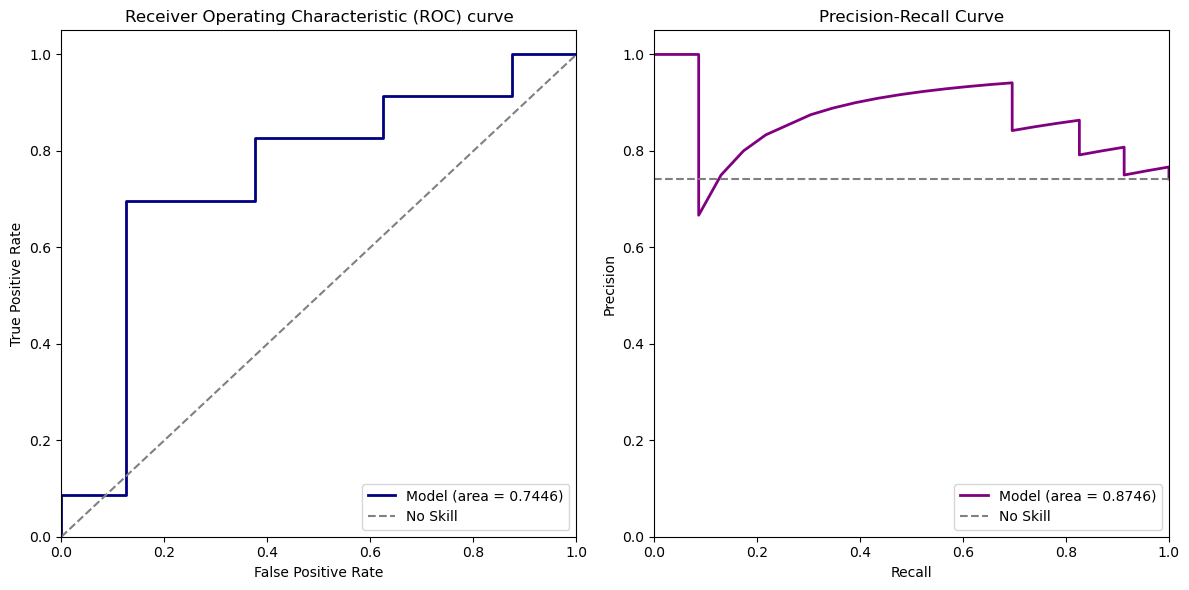

In [9]:
model_PACLITAXEL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [10]:
model_PACLITAXEL.get_train_set_results(best_parameters, False)

,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,35,"{0: 30, 1: 5}",0.393333,0.138155
0,TCGA,82,"{1: 53, 0: 29}",0.936890,0.962738


Distribution of Predictions by Model
[0.57056785 0.64304405 0.65997428 0.67242277 0.68807453]
TP: 23, FP: 8, TN: 0, FN: 0


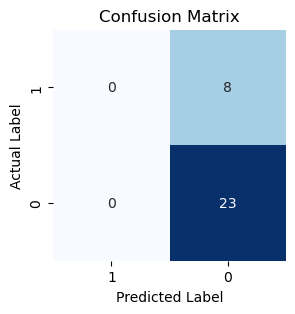

In [11]:
model_PACLITAXEL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

### CISPLATIN

In [12]:
best_parameters = {'predicted_probability_conf': 0.4137537177652121,
 'predicted_aadrc_conf': 0.41988574955612423,
 'ldr': 0.409927393309772,
 'lr': 0.37537202006205916,
 'weight_decay': 0.02082757867872715,
 'momentum': 0.5950091206468642,
 'step_size': 57,
 'loops_train': 500,
 'loops_warm': 70,
 'hd': 3,
 'batch_size': 32,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [13]:
model_CISPLATIN = ModelDECOTAwoMixup('CISPLATIN', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_CISPLATIN.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.409927393309772, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.409927393309772, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,36,"{1: 27, 0: 9}",0.621399,0.825501


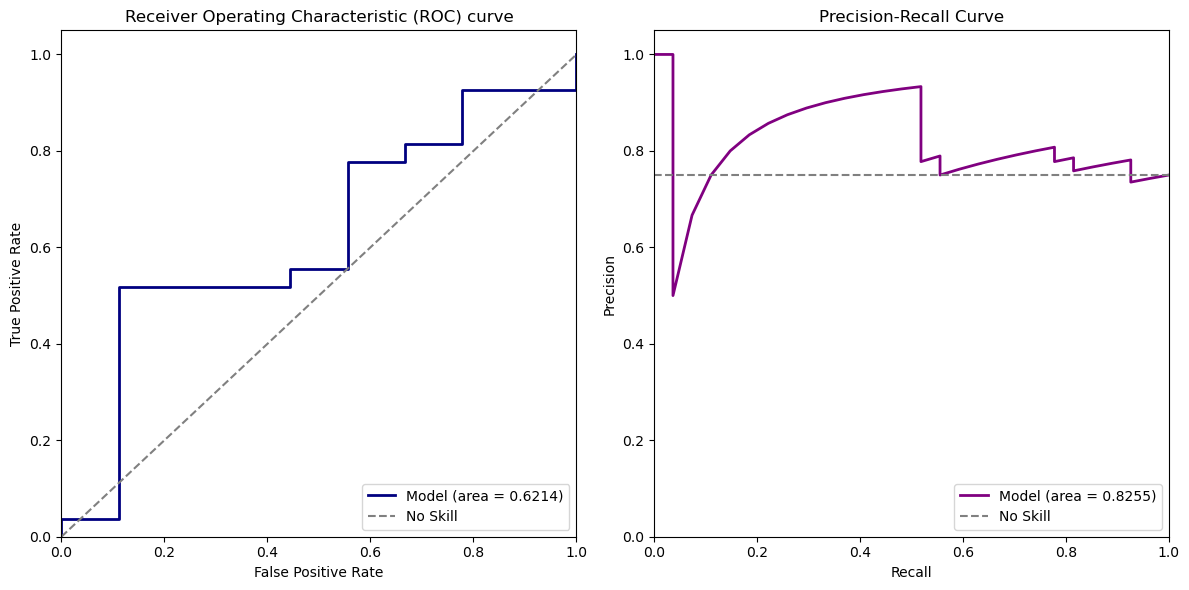

In [14]:
model_CISPLATIN.get_roc_pr_curves(best_parameters, False, 'tcga')

In [15]:
model_CISPLATIN.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,170,"{1: 130, 0: 40}",0.970096,0.991502


Distribution of Predictions by Model
[0.03817101 0.28590639 0.75448221 0.83767682 0.92497993]
TP: 17, FP: 5, TN: 4, FN: 10


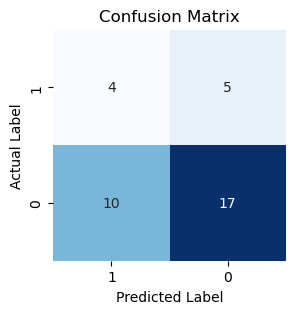

In [16]:
model_CISPLATIN.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## 5-FLUOROURACIL

In [17]:
best_parameters = {'predicted_probability_conf': 0.37000606536046093,
 'predicted_aadrc_conf': 0.44503735786763693,
 'ldr': 0.43595293295236276,
 'batch_size': 128,
 'lr': 0.3124625484980849,
 'weight_decay': 0.07969844292358542,
 'momentum': 0.4109033621973646,
 'step_size': 100,
 'loops_train': 500,
 'loops_warm': 70,
 'hd': 4,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [18]:
model_5_FLUOROURACIL = ModelDECOTAwoMixup('5-FLUOROURACIL', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_5_FLUOROURACIL.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.43595293295236276, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.43595293295236276, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
     

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,21,"{1: 17, 0: 4}",0.698529,0.878852


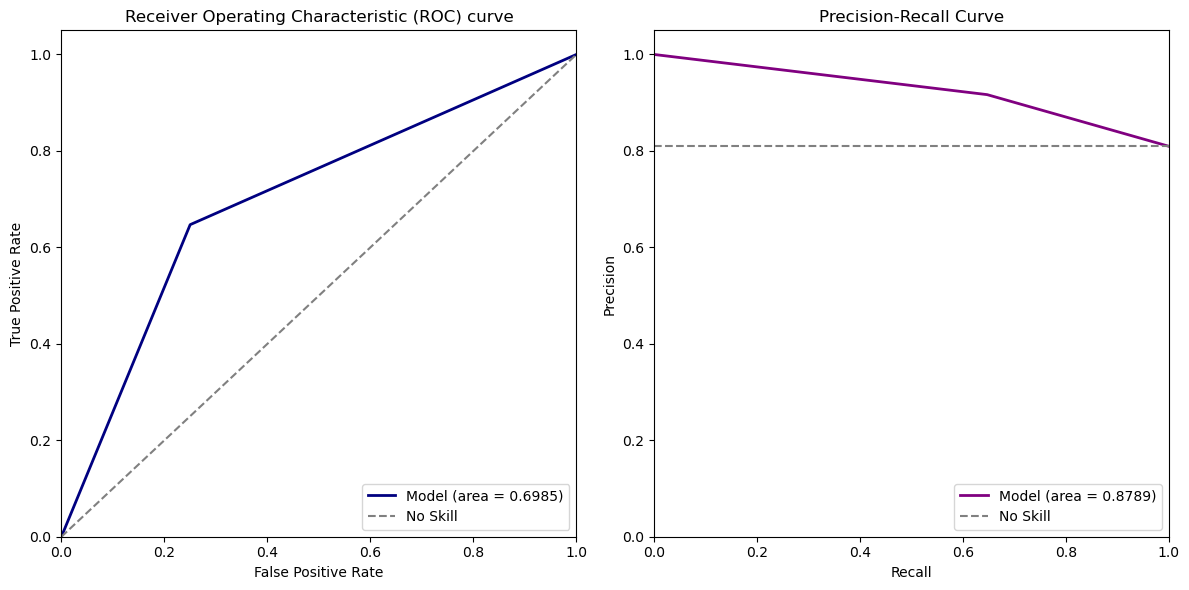

In [19]:
model_5_FLUOROURACIL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [20]:
model_5_FLUOROURACIL.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,104,"{1: 65, 0: 39}",0.346154,0.565611


Distribution of Predictions by Model
[0.36312425 0.36312425 0.36312428 0.36312428 0.36312428]
TP: 0, FP: 0, TN: 4, FN: 17


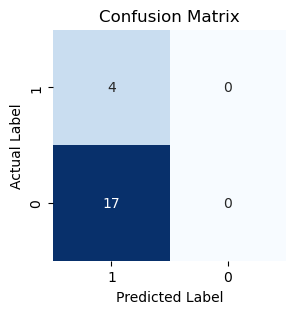

In [21]:
model_5_FLUOROURACIL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## CYCLOPHOSPHAMIDE

In [22]:
best_parameters = {'predicted_probability_conf': 0.19000889416784048,
 'predicted_aadrc_conf': 0.3507147140800953,
 'ldr': 0.17931795402429998,
 'batch_size': 128,
 'lr': 0.18024646999314428,
 'weight_decay': 0.07224124360071496,
 'momentum': 0.5730707745999097,
 'step_size': 38,
 'loops_train': 600,
 'loops_warm': 60,
 'hd': 2,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [23]:
model_CYCLOPHOSPHAMIDE = ModelDECOTAwoMixup('CYCLOPHOSPHAMIDE', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_CYCLOPHOSPHAMIDE.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.17931795402429998, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.17931795402429998, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linea

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,19,"{1: 17, 0: 2}",0.941176,0.993272


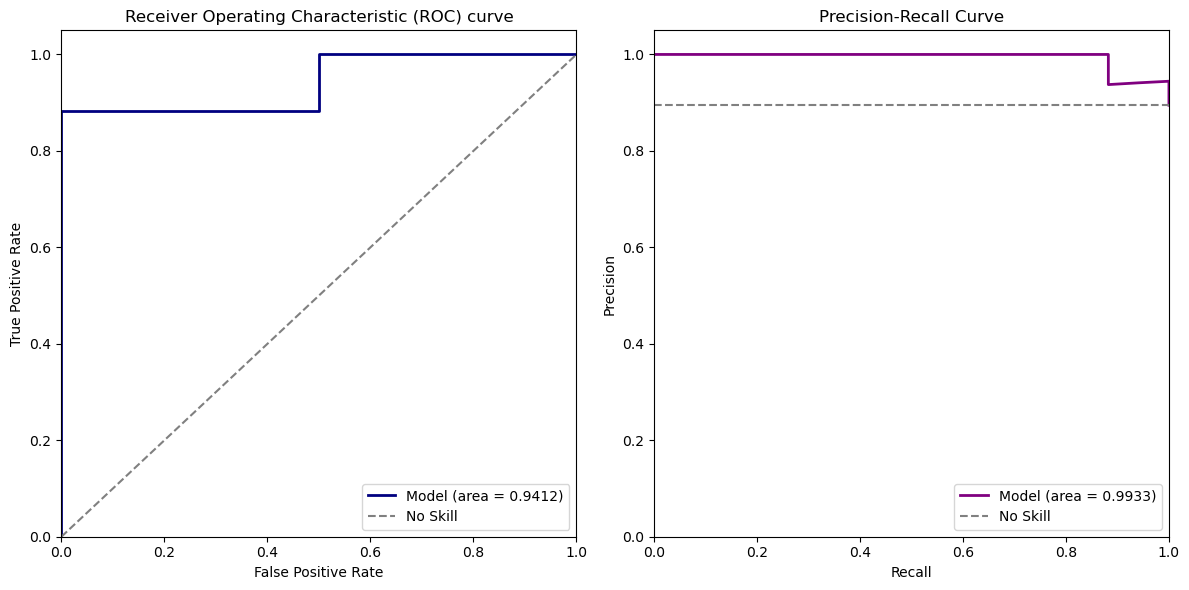

In [24]:
model_CYCLOPHOSPHAMIDE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [25]:
model_CYCLOPHOSPHAMIDE.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,50,"{1: 47, 0: 3}",0.971631,0.998169


Distribution of Predictions by Model
[0.95036441 0.95086229 0.9511683  0.95129701 0.95158303]
TP: 17, FP: 2, TN: 0, FN: 0


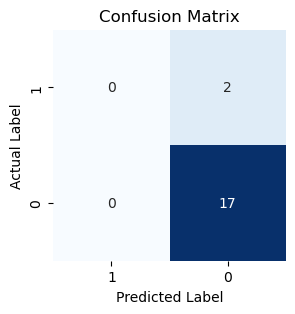

In [26]:
model_CYCLOPHOSPHAMIDE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## GEMCITABINE

In [27]:
best_parameters = {'predicted_probability_conf': 0.25505730195897547,
 'predicted_aadrc_conf': 0.486865241426836,
 'ldr': 0.15832706376210787,
 'lr': 0.08231278942513771,
 'weight_decay': 0.08180644277075355,
 'momentum': 0.3744552406146294,
 'step_size': 66,
 'loops_train': 600,
 'loops_warm': 70,
 'hd': 3,
 'batch_size': 64,
 'test_every': 1,
 'seed': 42,
 'use_source': 0}

In [28]:
model_GEMCITABINE = ModelDECOTAwoMixup('GEMCITABINE', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_GEMCITABINE.get_results(best_parameters)

DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.15832706376210787, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.15832706376210787, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (classifier): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
)
DomainSpecificNN(
  (feature): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Re

,dataset,length_dataset,value_counts,roc_auc,aupr
0,TCGA,18,"{0: 9, 1: 9}",0.740741,0.754155


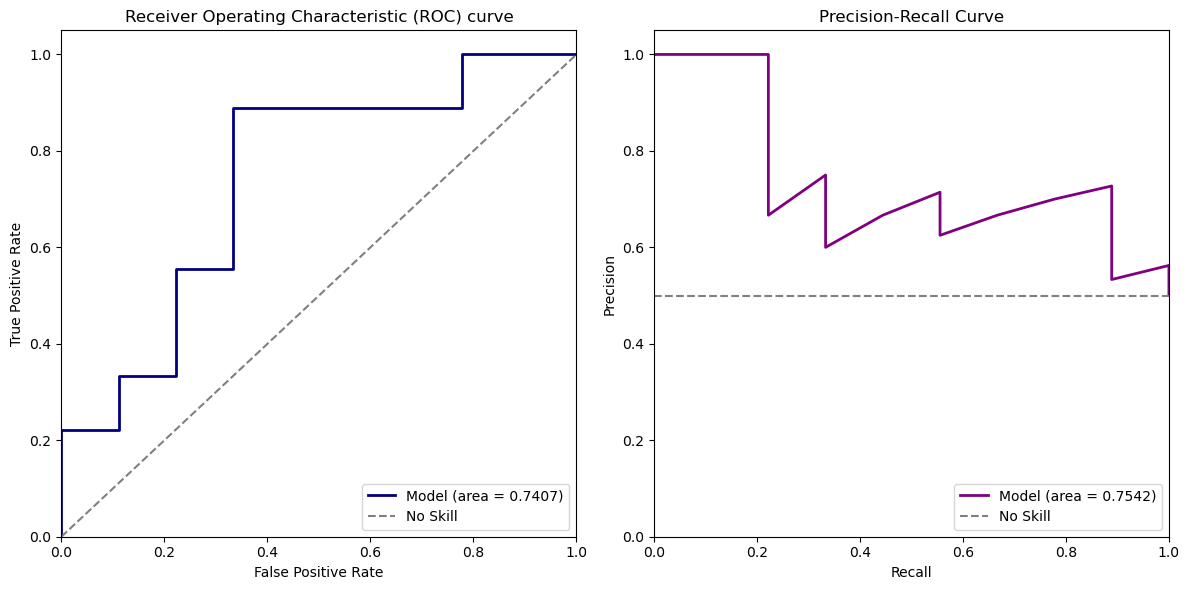

In [29]:
model_GEMCITABINE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [30]:
model_GEMCITABINE.get_train_set_results(best_parameters, False)

Test set Idx 0 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,PDX,0,{},NaN,NaN
0,TCGA,44,"{1: 27, 0: 17}",0.947712,0.97249


Distribution of Predictions by Model
[0.39531812 0.56300363 0.58999041 0.62226801 0.7064907 ]
TP: 8, FP: 7, TN: 2, FN: 1


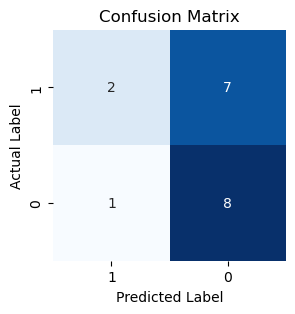

In [31]:
model_GEMCITABINE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)